# Basic Testing

In this notebook we test that the main files work well.

In [1]:
from imports import *
from agents import BetaAgent
from model import Model

## Try with variance

In [5]:
n_agents = 100
my_network = G = nx.gnp_random_graph(n_agents, p=0.2, directed=True)
nx.complete_graph(n_agents) #create_hybrid_network(20,degree=5,p_preferential_attachment=.01)#nx.erdos_renyi_graph(n_agents, 0.009)\n",
my_model = Model(my_network, n_experiments=30, uncertainty=0.001,
                 histories=True,sampling_update=False,variance_stopping = True,directed_network = True)
my_model.run_simulation(number_of_steps=10000,show_bar=True) #number_of_steps is a max amount\n",
print('steps: ',my_model.n_steps)
df = pd.DataFrame(my_model.agent_histories)
df.info()

 11%|█         | 1119/10000 [00:51<06:51, 21.57it/s]


steps:  1120
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 2241 entries, 0 to 2240
dtypes: object(2241)
memory usage: 1.7+ MB


In [6]:
# print(my_model.agents_alphas_betas)
print(len(my_model.init_agents_alphas_betas))
# print(my_model.degree_centrality_vector)
print(len(my_model.degree_centrality_vector))

100
100


## Try without variance

In [7]:
n_agents = 100
my_network = G = nx.gnp_random_graph(n_agents, p=0.2, directed=True)
nx.complete_graph(n_agents) #create_hybrid_network(20,degree=5,p_preferential_attachment=.01)#nx.erdos_renyi_graph(n_agents, 0.009)\n",
my_model = Model(my_network, n_experiments=30, uncertainty=0.001,
                 histories=True,sampling_update=False,variance_stopping = False,directed_network = True)
my_model.run_simulation(number_of_steps=10000,show_bar=True) #number_of_steps is a max amount\n",
print('steps: ',my_model.n_steps)
df = pd.DataFrame(my_model.agent_histories)
df.info()

  4%|▍         | 442/10000 [00:12<04:29, 35.51it/s]


steps:  443
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 887 entries, 0 to 886
dtypes: object(887)
memory usage: 693.1+ KB


In [8]:
# print(my_model.agents_alphas_betas)
print(len(my_model.init_agents_alphas_betas))
print(my_model.degree_centrality_vector)
print(len(my_model.degree_centrality_vector))

100
[0.49494949 0.4040404  0.42424242 0.4040404  0.39393939 0.42424242
 0.31313131 0.35353535 0.53535354 0.38383838 0.49494949 0.33333333
 0.32323232 0.31313131 0.4040404  0.45454545 0.38383838 0.33333333
 0.4040404  0.34343434 0.3030303  0.46464646 0.49494949 0.44444444
 0.53535354 0.35353535 0.41414141 0.38383838 0.49494949 0.45454545
 0.46464646 0.38383838 0.32323232 0.36363636 0.39393939 0.37373737
 0.37373737 0.37373737 0.35353535 0.28282828 0.33333333 0.34343434
 0.4040404  0.41414141 0.42424242 0.39393939 0.39393939 0.37373737
 0.45454545 0.54545455 0.37373737 0.4040404  0.37373737 0.4040404
 0.39393939 0.44444444 0.45454545 0.35353535 0.51515152 0.4040404
 0.34343434 0.4040404  0.33333333 0.47474747 0.45454545 0.36363636
 0.48484848 0.31313131 0.39393939 0.41414141 0.49494949 0.3030303
 0.44444444 0.38383838 0.44444444 0.3030303  0.36363636 0.39393939
 0.34343434 0.34343434 0.32323232 0.43434343 0.42424242 0.4040404
 0.39393939 0.37373737 0.38383838 0.41414141 0.43434343 0.3131

## Santity checks

In [9]:
print('steps: ',my_model.n_steps)
print('conclusion: ',my_model.conclusion)
df.head(3)

steps:  443
conclusion:  0.81


,0,1,2,3,4,5,6,7,8,9,...,877,878,879,880,881,882,883,884,885,886
0,"[0.6341431279639004, 0.5436279676332985]","[0.5096026145167669, 0.5436279676332985]","[0.5096026145167669, 0.5335048229062183]","[0.4857269411766301, 0.5335048229062183]","[0.4857269411766301, 0.5118516515779454]","[0.4871343874197028, 0.5118516515779454]","[0.4871343874197028, 0.5205522730164974]","[0.49076486780894096, 0.5205522730164974]","[0.49076486780894096, 0.5239500033344198]","[0.4906333637733039, 0.5239500033344198]",...,"[0.5003431383129053, 0.49937924097283615]","[0.5003431383129053, 0.499331570193119]","[0.500462555092974, 0.499331570193119]","[0.500462555092974, 0.4993736156861153]","[0.500461827504883, 0.4993736156861153]","[0.500461827504883, 0.49941552528470506]","[0.5004163240163522, 0.49941552528470506]","[0.5004163240163522, 0.4995196869891447]","[0.5003485322437234, 0.4995196869891447]","[0.5003485322437234, 0.49952992186482]"
1,"[0.6817613256655126, 0.5266557563406319]","[0.5085976176508515, 0.5266557563406319]","[0.5085976176508515, 0.5223659572081167]","[0.48001800488500435, 0.5223659572081167]","[0.48001800488500435, 0.5332552890586281]","[0.4811237341097041, 0.5332552890586281]","[0.4811237341097041, 0.5272689914192566]","[0.48687225796672007, 0.5272689914192566]","[0.48687225796672007, 0.5129414489746988]","[0.48325192248271137, 0.5129414489746988]",...,"[0.5003519098539895, 0.5021445001730549]","[0.5003519098539895, 0.5021864622635647]","[0.5003899334094655, 0.5021864622635647]","[0.5003899334094655, 0.5021331425195233]","[0.500234983336383, 0.5021331425195233]","[0.500234983336383, 0.5020733323823132]","[0.5002153254586348, 0.5020733323823132]","[0.5002153254586348, 0.5022164633322006]","[0.5002149530379256, 0.5022164633322006]","[0.5002149530379256, 0.502271268295587]"
2,"[0.8690060186698652, 0.35538228811012756]","[0.4896407109878264, 0.35538228811012756]","[0.4896407109878264, 0.541388432562014]","[0.4925840262786315, 0.541388432562014]","[0.4925840262786315, 0.5056236980937386]","[0.5014407687288566, 0.5056236980937386]","[0.5014407687288566, 0.5098574621337442]","[0.5010683175180702, 0.5098574621337442]","[0.5010683175180702, 0.5132806055886474]","[0.49281288161796677, 0.5132806055886474]",...,"[0.4992363162677136, 0.5019175303222351]","[0.4992363162677136, 0.5018402237661781]","[0.499258130939625, 0.5018402237661781]","[0.499258130939625, 0.50178541230911]","[0.4991757269613926, 0.50178541230911]","[0.4991757269613926, 0.5018628984078217]","[0.49914554576857645, 0.5018628984078217]","[0.49914554576857645, 0.501901561623583]","[0.49914661114681996, 0.501901561623583]","[0.49914661114681996, 0.501918133530164]"


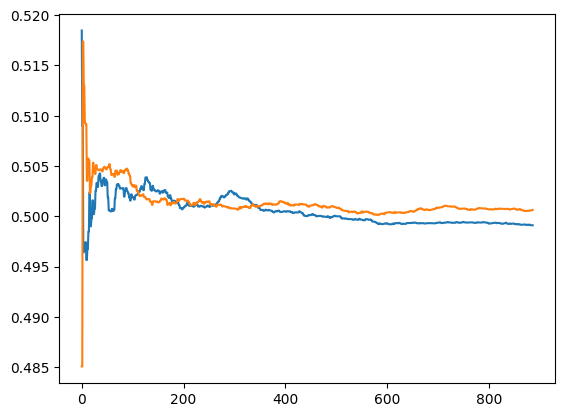

In [10]:
#Extract the first coordinate (x) for each pair and calculate column-wise mean
x_means = df.applymap(lambda pair: pair[0]).mean()
y_means = df.applymap(lambda pair: pair[1]).mean()
plt.plot(x_means)
plt.plot(y_means)

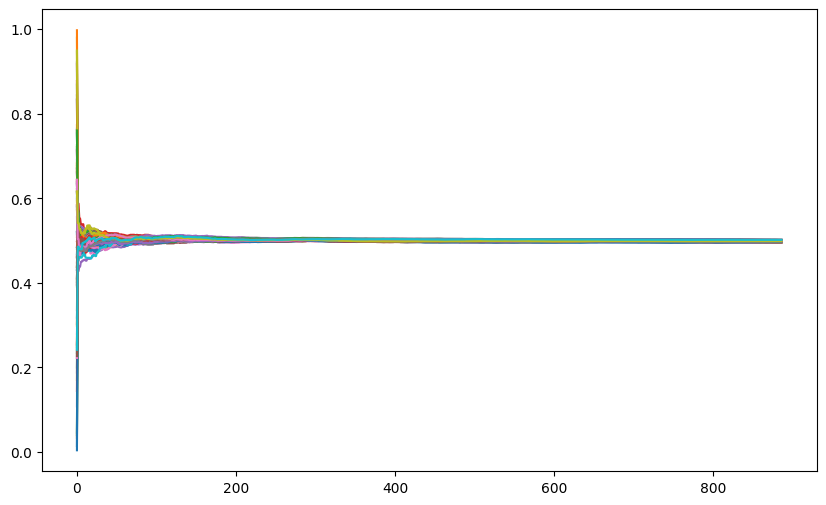

In [11]:
# Extract the first coordinate (x) for each pair
x_values = df.applymap(lambda pair: pair[0])

# Plot the first coordinate for each row
plt.figure(figsize=(10, 6))
for row_idx in range(x_values.shape[0]):
    plt.plot(x_values.columns, x_values.iloc[row_idx, :], label=f'Row {row_idx+1}' if row_idx < 5 else None)